In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from subprocess import check_output

In [3]:
print(check_output(["ls", "input"]).decode("utf8"))

in
stock_data.csv



In [4]:
data = pd.read_csv('input/stock_data.csv')
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500.0,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000.0,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000.0,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500.0,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900.0,AAL


In [5]:
cl = data[data['Name']=='AAPL'].close


In [6]:
data.Name.unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', nan], dtype=object)

In [7]:
scl = MinMaxScaler()
#Scale the data
cl = cl.reshape(cl.shape[0],1)
cl

/home/ubuntu/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 67.8542],
       [ 68.5614],
       [ 66.8428],
       ...,
       [156.49  ],
       [163.03  ],
       [159.54  ]])

In [8]:
cl = scl.fit_transform(cl)
cl

array([[0.0977103 ],
       [0.103438  ],
       [0.08951884],
       ...,
       [0.81558288],
       [0.86855117],
       [0.84028522]])

In [9]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
251
1000
251


In [10]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=400,validation_data=(X_test,y_test),shuffle=False)

Train on 1000 samples, validate on 251 samples
Epoch 1/400
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0015 - val_loss: 8.5087e-04
Epoch 2/400
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0045 - val_loss: 6.6146e-04
Epoch 3/400
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0011 - val_loss: 9.0477e-04
Epoch 4/400
1000/1000 [==============================] - 2s 2ms/step - loss: 7.6007e-04 - val_loss: 7.4973e-04
Epoch 5/400
1000/1000 [==============================] - 2s 2ms/step - loss: 7.1111e-04 - val_loss: 7.1988e-04
Epoch 6/400
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0010 - val_loss: 6.7028e-04
Epoch 7/400
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0010 - val_loss: 6.6395e-04
Epoch 8/400
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0016 - val_loss: 6.5162e-04
Epoch 9/400
1000/1000 [==============================] - 2s 2ms/step - loss: 6.1198e-04 -

Epoch 76/400
1000/1000 [==============================] - 2s 2ms/step - loss: 2.1100e-04 - val_loss: 0.0038
Epoch 77/400
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0968e-04 - val_loss: 0.0037
Epoch 78/400
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0839e-04 - val_loss: 0.0037
Epoch 79/400
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0715e-04 - val_loss: 0.0037
Epoch 80/400
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0595e-04 - val_loss: 0.0036
Epoch 81/400
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0478e-04 - val_loss: 0.0036
Epoch 82/400
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0365e-04 - val_loss: 0.0036
Epoch 83/400
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0255e-04 - val_loss: 0.0035
Epoch 84/400
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0148e-04 - val_loss: 0.0035
Epoch 85/400
1000/1000 [====

1000/1000 [==============================] - 2s 2ms/step - loss: 2.0432e-04 - val_loss: 0.0013
Epoch 152/400
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0583e-04 - val_loss: 0.0012
Epoch 153/400
1000/1000 [==============================] - 2s 2ms/step - loss: 2.2480e-04 - val_loss: 0.0010
Epoch 154/400
1000/1000 [==============================] - 2s 2ms/step - loss: 2.2734e-04 - val_loss: 0.0010
Epoch 155/400
1000/1000 [==============================] - 2s 2ms/step - loss: 2.3334e-04 - val_loss: 8.6670e-04
Epoch 156/400
1000/1000 [==============================] - 2s 2ms/step - loss: 2.3708e-04 - val_loss: 9.1176e-04
Epoch 157/400
1000/1000 [==============================] - 2s 2ms/step - loss: 2.3795e-04 - val_loss: 0.0011
Epoch 158/400
1000/1000 [==============================] - 2s 2ms/step - loss: 2.3288e-04 - val_loss: 0.0013
Epoch 159/400
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0504e-04 - val_loss: 0.0014
Epoch 160/400
1000/1000 [

1000/1000 [==============================] - 2s 2ms/step - loss: 1.8278e-04 - val_loss: 0.0012
Epoch 227/400
1000/1000 [==============================] - 2s 2ms/step - loss: 1.8799e-04 - val_loss: 0.0011
Epoch 228/400
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7856e-04 - val_loss: 0.0013
Epoch 229/400
1000/1000 [==============================] - 2s 2ms/step - loss: 1.6347e-04 - val_loss: 0.0014
Epoch 230/400
1000/1000 [==============================] - 2s 2ms/step - loss: 1.6810e-04 - val_loss: 0.0014
Epoch 231/400
1000/1000 [==============================] - 2s 2ms/step - loss: 1.6345e-04 - val_loss: 0.0014
Epoch 232/400
1000/1000 [==============================] - 2s 2ms/step - loss: 1.6966e-04 - val_loss: 0.0014
Epoch 233/400
1000/1000 [==============================] - 2s 2ms/step - loss: 1.6570e-04 - val_loss: 0.0014
Epoch 234/400
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7215e-04 - val_loss: 0.0014
Epoch 235/400
1000/1000 [========

1000/1000 [==============================] - 2s 2ms/step - loss: 1.6962e-04 - val_loss: 0.0022
Epoch 302/400
1000/1000 [==============================] - 2s 2ms/step - loss: 1.6953e-04 - val_loss: 0.0022
Epoch 303/400
1000/1000 [==============================] - 3s 3ms/step - loss: 1.6976e-04 - val_loss: 0.0022
Epoch 304/400
1000/1000 [==============================] - 3s 3ms/step - loss: 1.7025e-04 - val_loss: 0.0023
Epoch 305/400
1000/1000 [==============================] - 3s 3ms/step - loss: 1.7039e-04 - val_loss: 0.0023
Epoch 306/400
1000/1000 [==============================] - 3s 3ms/step - loss: 1.6874e-04 - val_loss: 0.0023
Epoch 307/400
1000/1000 [==============================] - 3s 3ms/step - loss: 1.7243e-04 - val_loss: 0.0024
Epoch 308/400
1000/1000 [==============================] - 3s 3ms/step - loss: 1.7236e-04 - val_loss: 0.0024
Epoch 309/400
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7312e-04 - val_loss: 0.0025
Epoch 310/400
1000/1000 [========

1000/1000 [==============================] - 2s 2ms/step - loss: 1.9163e-04 - val_loss: 9.5715e-04
Epoch 376/400
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7433e-04 - val_loss: 5.1195e-04
Epoch 377/400
1000/1000 [==============================] - 3s 3ms/step - loss: 1.5045e-04 - val_loss: 5.8151e-04
Epoch 378/400
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5616e-04 - val_loss: 6.8016e-04
Epoch 379/400
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5337e-04 - val_loss: 5.8099e-04
Epoch 380/400
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5262e-04 - val_loss: 6.4218e-04
Epoch 381/400
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5331e-04 - val_loss: 6.1884e-04
Epoch 382/400
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5198e-04 - val_loss: 6.0933e-04
Epoch 383/400
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5227e-04 - val_loss: 6.1858e-

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


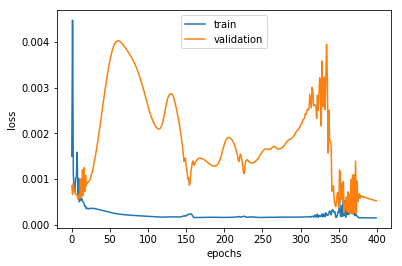

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])

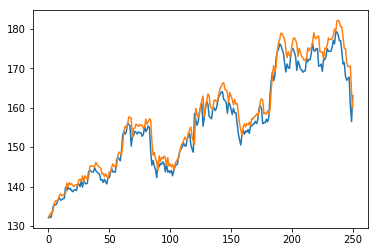

In [13]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [14]:
act = []
pred = []
for i in range(4):
    Xt = model.predict(X_test[i].reshape(1,7,1))
    print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
    pred.append(scl.inverse_transform(Xt))
    act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[132.20193]], actual:[[132.04]]
predicted:[[132.81535]], actual:[[132.42]]
predicted:[[133.30074]], actual:[[132.12]]
predicted:[[133.05042]], actual:[[133.29]]


In [15]:
#Build the model
model = Sequential()
model.add(LSTM(256,return_sequences=True,input_shape=(7,1)))
model.add(LSTM(256))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

Train on 1000 samples, validate on 251 samples
Epoch 1/300
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 2/300
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0069 - val_loss: 0.0033
Epoch 3/300
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0021 - val_loss: 0.0010
Epoch 4/300
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0019 - val_loss: 9.9757e-04
Epoch 5/300
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0011 - val_loss: 8.1036e-04
Epoch 6/300
1000/1000 [==============================] - 4s 4ms/step - loss: 6.1154e-04 - val_loss: 6.7105e-04
Epoch 7/300
1000/1000 [==============================] - 4s 4ms/step - loss: 5.6115e-04 - val_loss: 6.0931e-04
Epoch 8/300
1000/1000 [==============================] - 4s 4ms/step - loss: 4.8962e-04 - val_loss: 8.3616e-04
Epoch 9/300
1000/1000 [==============================] - 4s 4ms/step - loss: 7.6603e-04 - val_los

1000/1000 [==============================] - 5s 5ms/step - loss: 1.9255e-04 - val_loss: 0.0027
Epoch 77/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7042e-04 - val_loss: 0.0022
Epoch 78/300
1000/1000 [==============================] - 5s 5ms/step - loss: 1.8811e-04 - val_loss: 0.0025
Epoch 79/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6843e-04 - val_loss: 0.0022
Epoch 80/300
1000/1000 [==============================] - 5s 5ms/step - loss: 1.9028e-04 - val_loss: 0.0024
Epoch 81/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6616e-04 - val_loss: 0.0020
Epoch 82/300
1000/1000 [==============================] - 5s 5ms/step - loss: 1.9668e-04 - val_loss: 0.0022
Epoch 83/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6343e-04 - val_loss: 0.0019
Epoch 84/300
1000/1000 [==============================] - 4s 4ms/step - loss: 2.0814e-04 - val_loss: 0.0021
Epoch 85/300
1000/1000 [=================

1000/1000 [==============================] - 4s 4ms/step - loss: 2.5566e-04 - val_loss: 0.0054
Epoch 152/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7399e-04 - val_loss: 0.0040
Epoch 153/300
1000/1000 [==============================] - 4s 4ms/step - loss: 2.2718e-04 - val_loss: 0.0038
Epoch 154/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.9090e-04 - val_loss: 0.0050
Epoch 155/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.8838e-04 - val_loss: 0.0051
Epoch 156/300
1000/1000 [==============================] - 5s 5ms/step - loss: 1.8554e-04 - val_loss: 0.0050
Epoch 157/300
1000/1000 [==============================] - 6s 6ms/step - loss: 1.8915e-04 - val_loss: 0.0053
Epoch 158/300
1000/1000 [==============================] - 5s 5ms/step - loss: 1.9069e-04 - val_loss: 0.0056
Epoch 159/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.8999e-04 - val_loss: 0.0057
Epoch 160/300
1000/1000 [========

1000/1000 [==============================] - 4s 4ms/step - loss: 0.0012 - val_loss: 0.0080
Epoch 227/300
1000/1000 [==============================] - 4s 4ms/step - loss: 9.7148e-04 - val_loss: 5.2705e-04
Epoch 228/300
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 229/300
1000/1000 [==============================] - 4s 4ms/step - loss: 3.5111e-04 - val_loss: 0.0038
Epoch 230/300
1000/1000 [==============================] - 4s 4ms/step - loss: 3.8541e-04 - val_loss: 0.0033
Epoch 231/300
1000/1000 [==============================] - 4s 4ms/step - loss: 2.9696e-04 - val_loss: 0.0014
Epoch 232/300
1000/1000 [==============================] - 4s 4ms/step - loss: 8.0735e-04 - val_loss: 0.0012
Epoch 233/300
1000/1000 [==============================] - 4s 4ms/step - loss: 4.2294e-04 - val_loss: 2.5787e-04
Epoch 234/300
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 235/300
1000/1000 [============

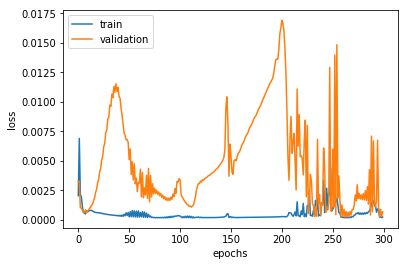

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 7, 256)            264192    
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 789,761
Trainable params: 789,761
Non-trainable params: 0
_________________________________________________________________


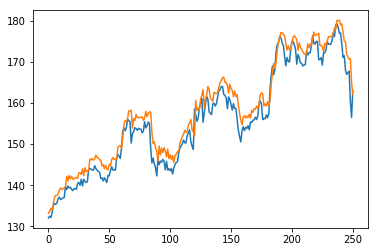

In [18]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))